In [1]:
from IPython import display
display.clear_output()

In [2]:
# Check the YOLO environment
import ultralytics
ultralytics.checks()

Ultralytics 8.3.134 🚀 Python-3.13.3 torch-2.7.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 342.2/460.4 GB disk)


In [3]:
# Import YOLOv8
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
# Set up and configure the YOLO model
# Load the best model checkpoint from the previous training
# Make sure to replace 'best.pt' with the actual path to your best model checkpoint
model = YOLO("yolov8s.pt")

# Set image size to 640 for optimal YOLOv8 compatibility
img_size = 640

In [11]:
# Training with advanced configuration and local logging
model.train(
    data="unocards_dataset/data.yaml",
    epochs=10,  # Extended epochs for better performance
    imgsz=img_size,
    batch=32,  # Adjust based on GPU memory capacity
    augment=True,  # Enable on-the-fly augmentation
    plots=True,  # Enables training plots
    workers=4,
    lr0=1e-3,
    lrf=0.01,
    warmup_epochs=3,
    warmup_momentum=0.5,
    box=0.05,
    cls=0.5,
    mosaic=1.0,
    mixup=0.1,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    perspective=0.001,
    flipud=0.5,
    fliplr=0.5,
    copy_paste=0.2,
    device='cpu',  # Specify GPU
    project="uno_train2",  # Specify project folder for local saving
)

Ultralytics 8.3.134 🚀 Python-3.13.3 torch-2.7.0 CPU (Apple M1)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=0.05, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=unocards_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.001, plots=True, pose=12.0, pretrained=True, profile=Fals

train: Scanning /Volumes/NICE/yang penting 2/unocards_dataset/labels/train.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 28.0±4.0 MB/s, size: 52.3 KB)



val: Scanning /Volumes/NICE/yang penting 2/unocards_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

Plotting labels to uno_train2/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to uno_train2/train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:58<00:00, 39.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:30<00:00, 30.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:31<00:00, 30.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:31<00:00, 30.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:29<00:00, 29.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:29<00:00, 29.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:32<00:00, 30.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:32<00:00, 30.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:33<00:00, 31.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G        nan        nan        nan         23        640: 100%|██████████| 3/3 [01:33<00:00, 31.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

                   all         10         10          0          0          0          0



10 epochs completed in 0.282 hours.
Optimizer stripped from uno_train2/train3/weights/last.pt, 22.5MB
Optimizer stripped from uno_train2/train3/weights/best.pt, 22.5MB

Validating uno_train2/train3/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.13.3 torch-2.7.0 CPU (Apple M1)
Model summary (fused): 72 layers, 11,146,482 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]


                   all         10         10          0          0          0          0
                 red-1          1          1          0          0          0          0
                 red-2          3          3          0          0          0          0
                red-20          2          2          0          0          0          0
                 red-5          1          1          0          0          0          0
                 red-6          1          1          0          0          0          0
                 red-7          1          1          0          0          0          0
                 red-9          1          1          0          0          0          0
Speed: 1.0ms preprocess, 396.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to uno_train2/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  6,  7,  8, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x397384c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047

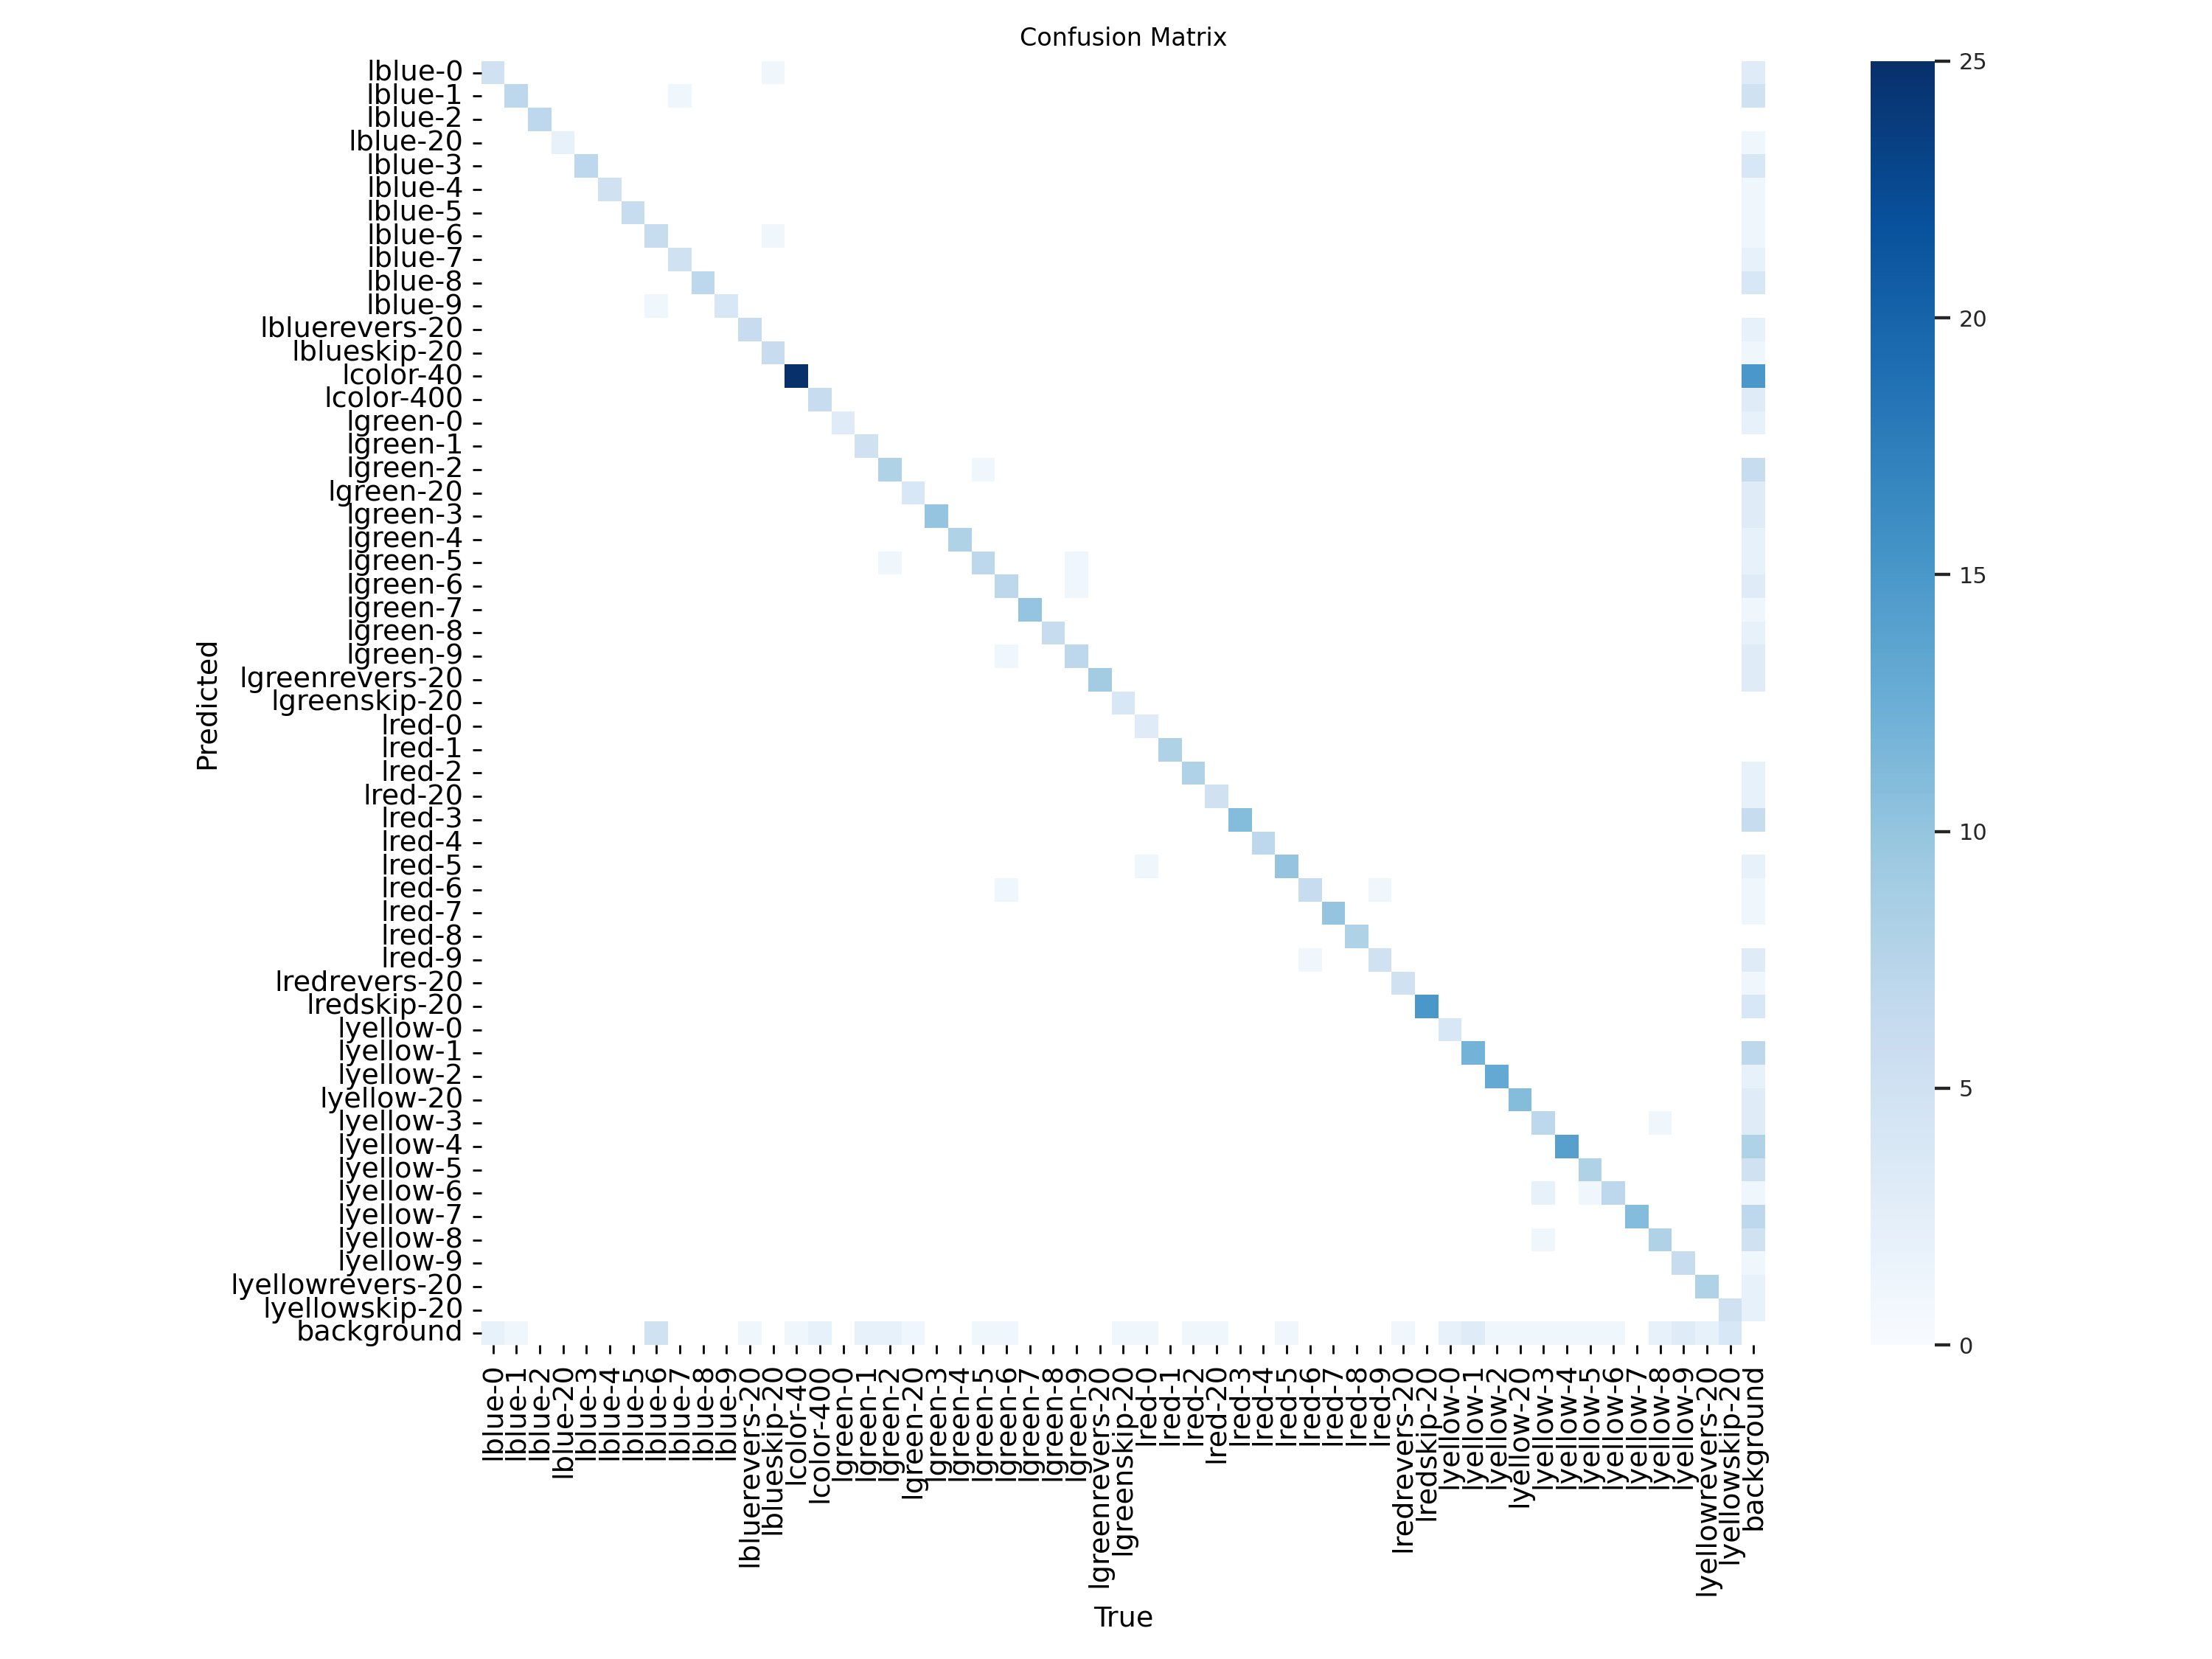

In [10]:
# Display training results locally
Image(filename='/content/UNO_Card_Detection_YOLOv8/train2/confusion_matrix.png', width=600)

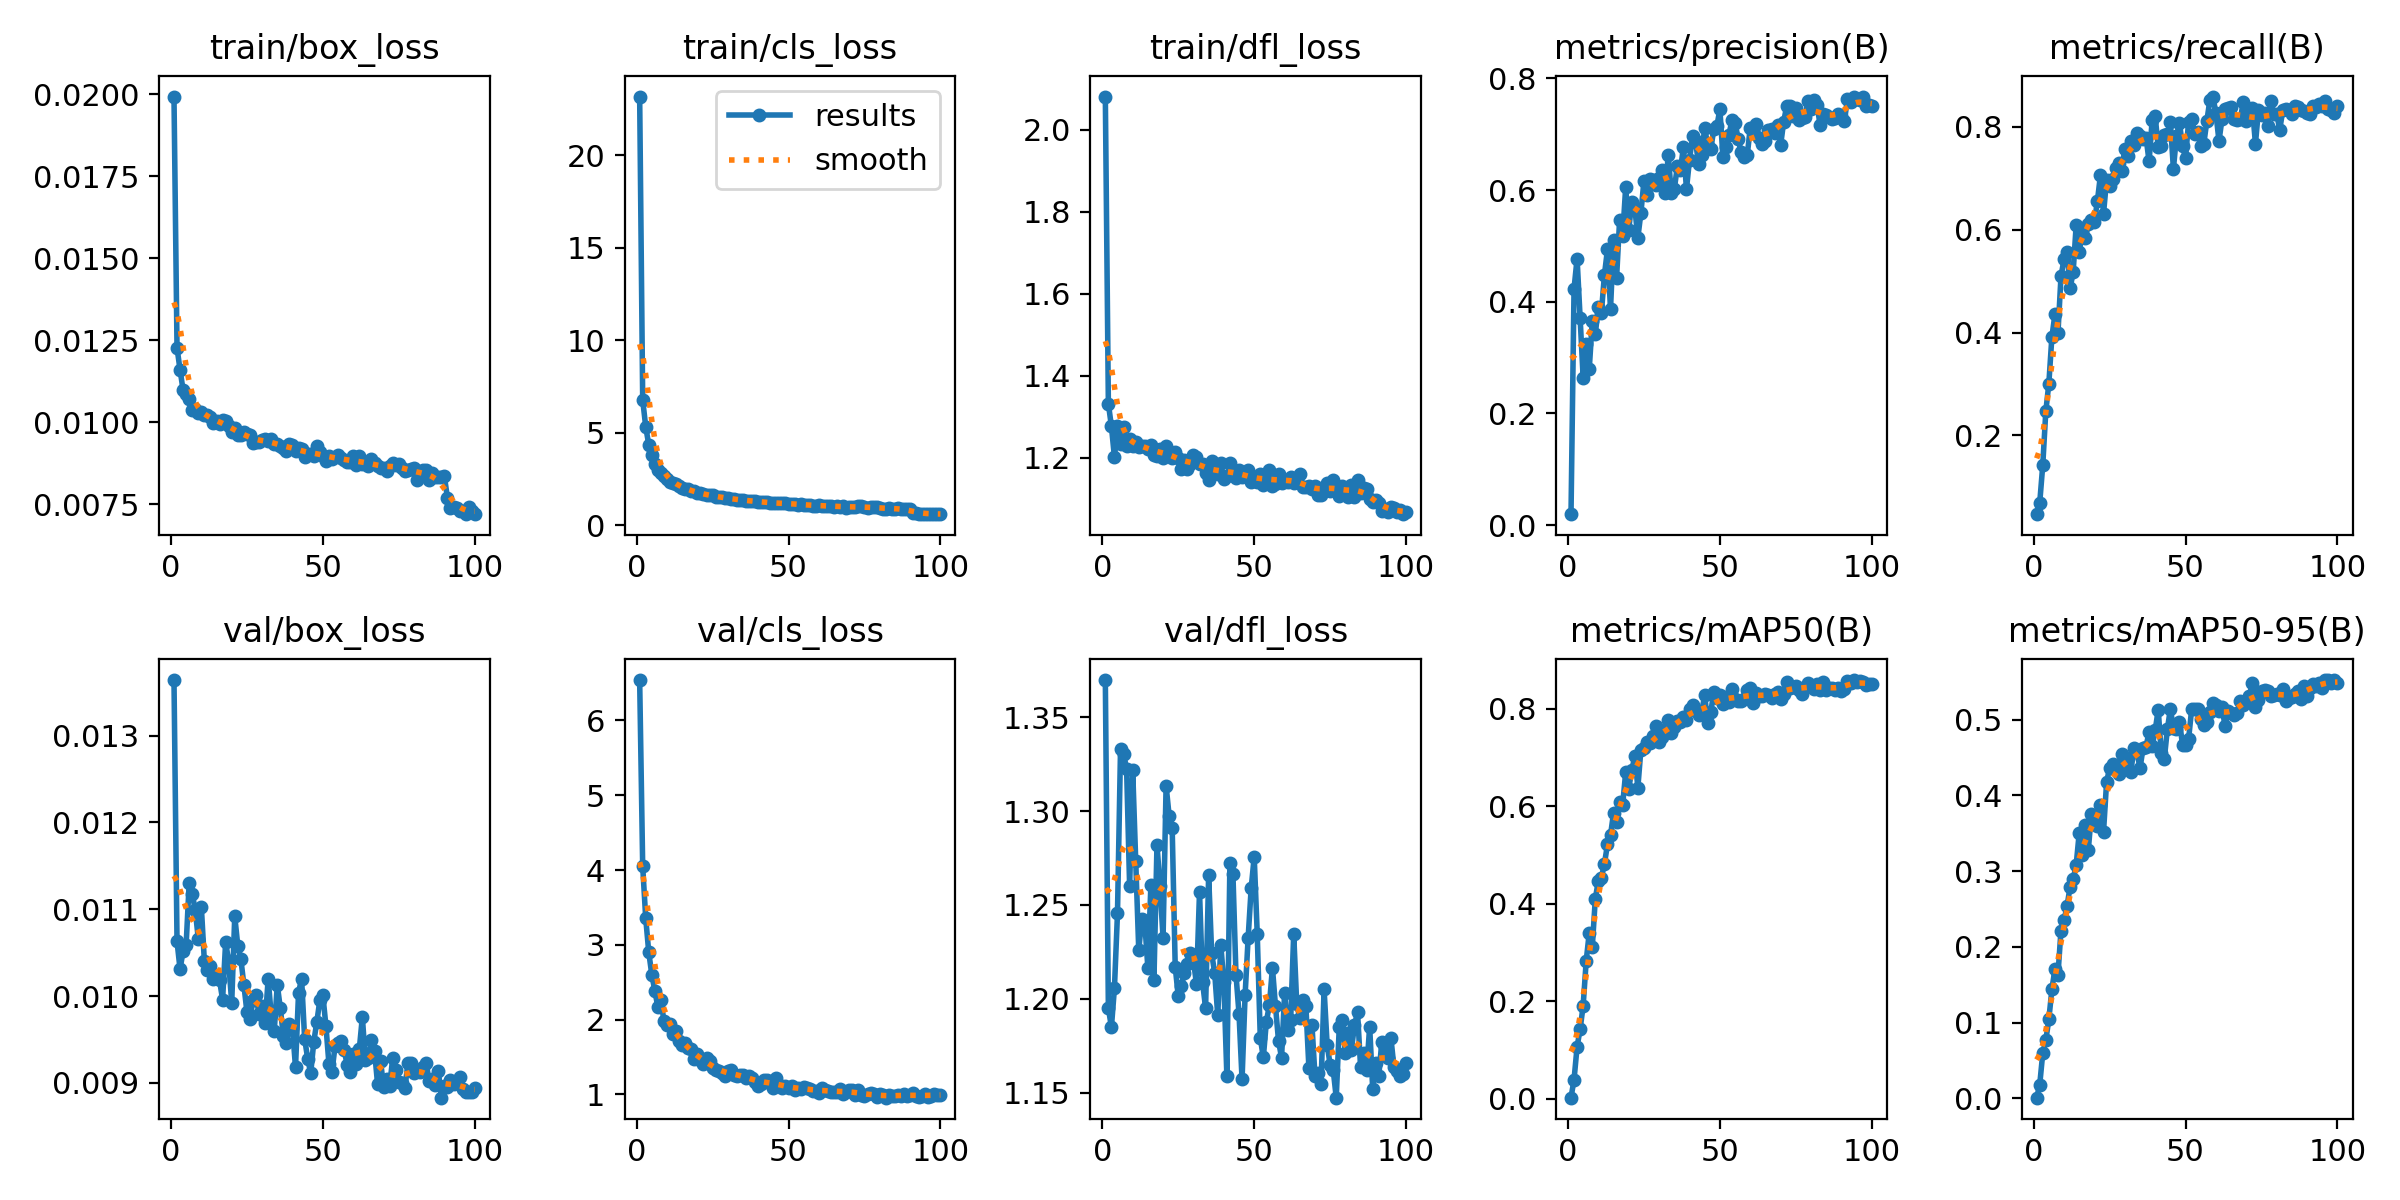

In [11]:
Image(filename='/content/UNO_Card_Detection_YOLOv8/train2/results.png', width=600)

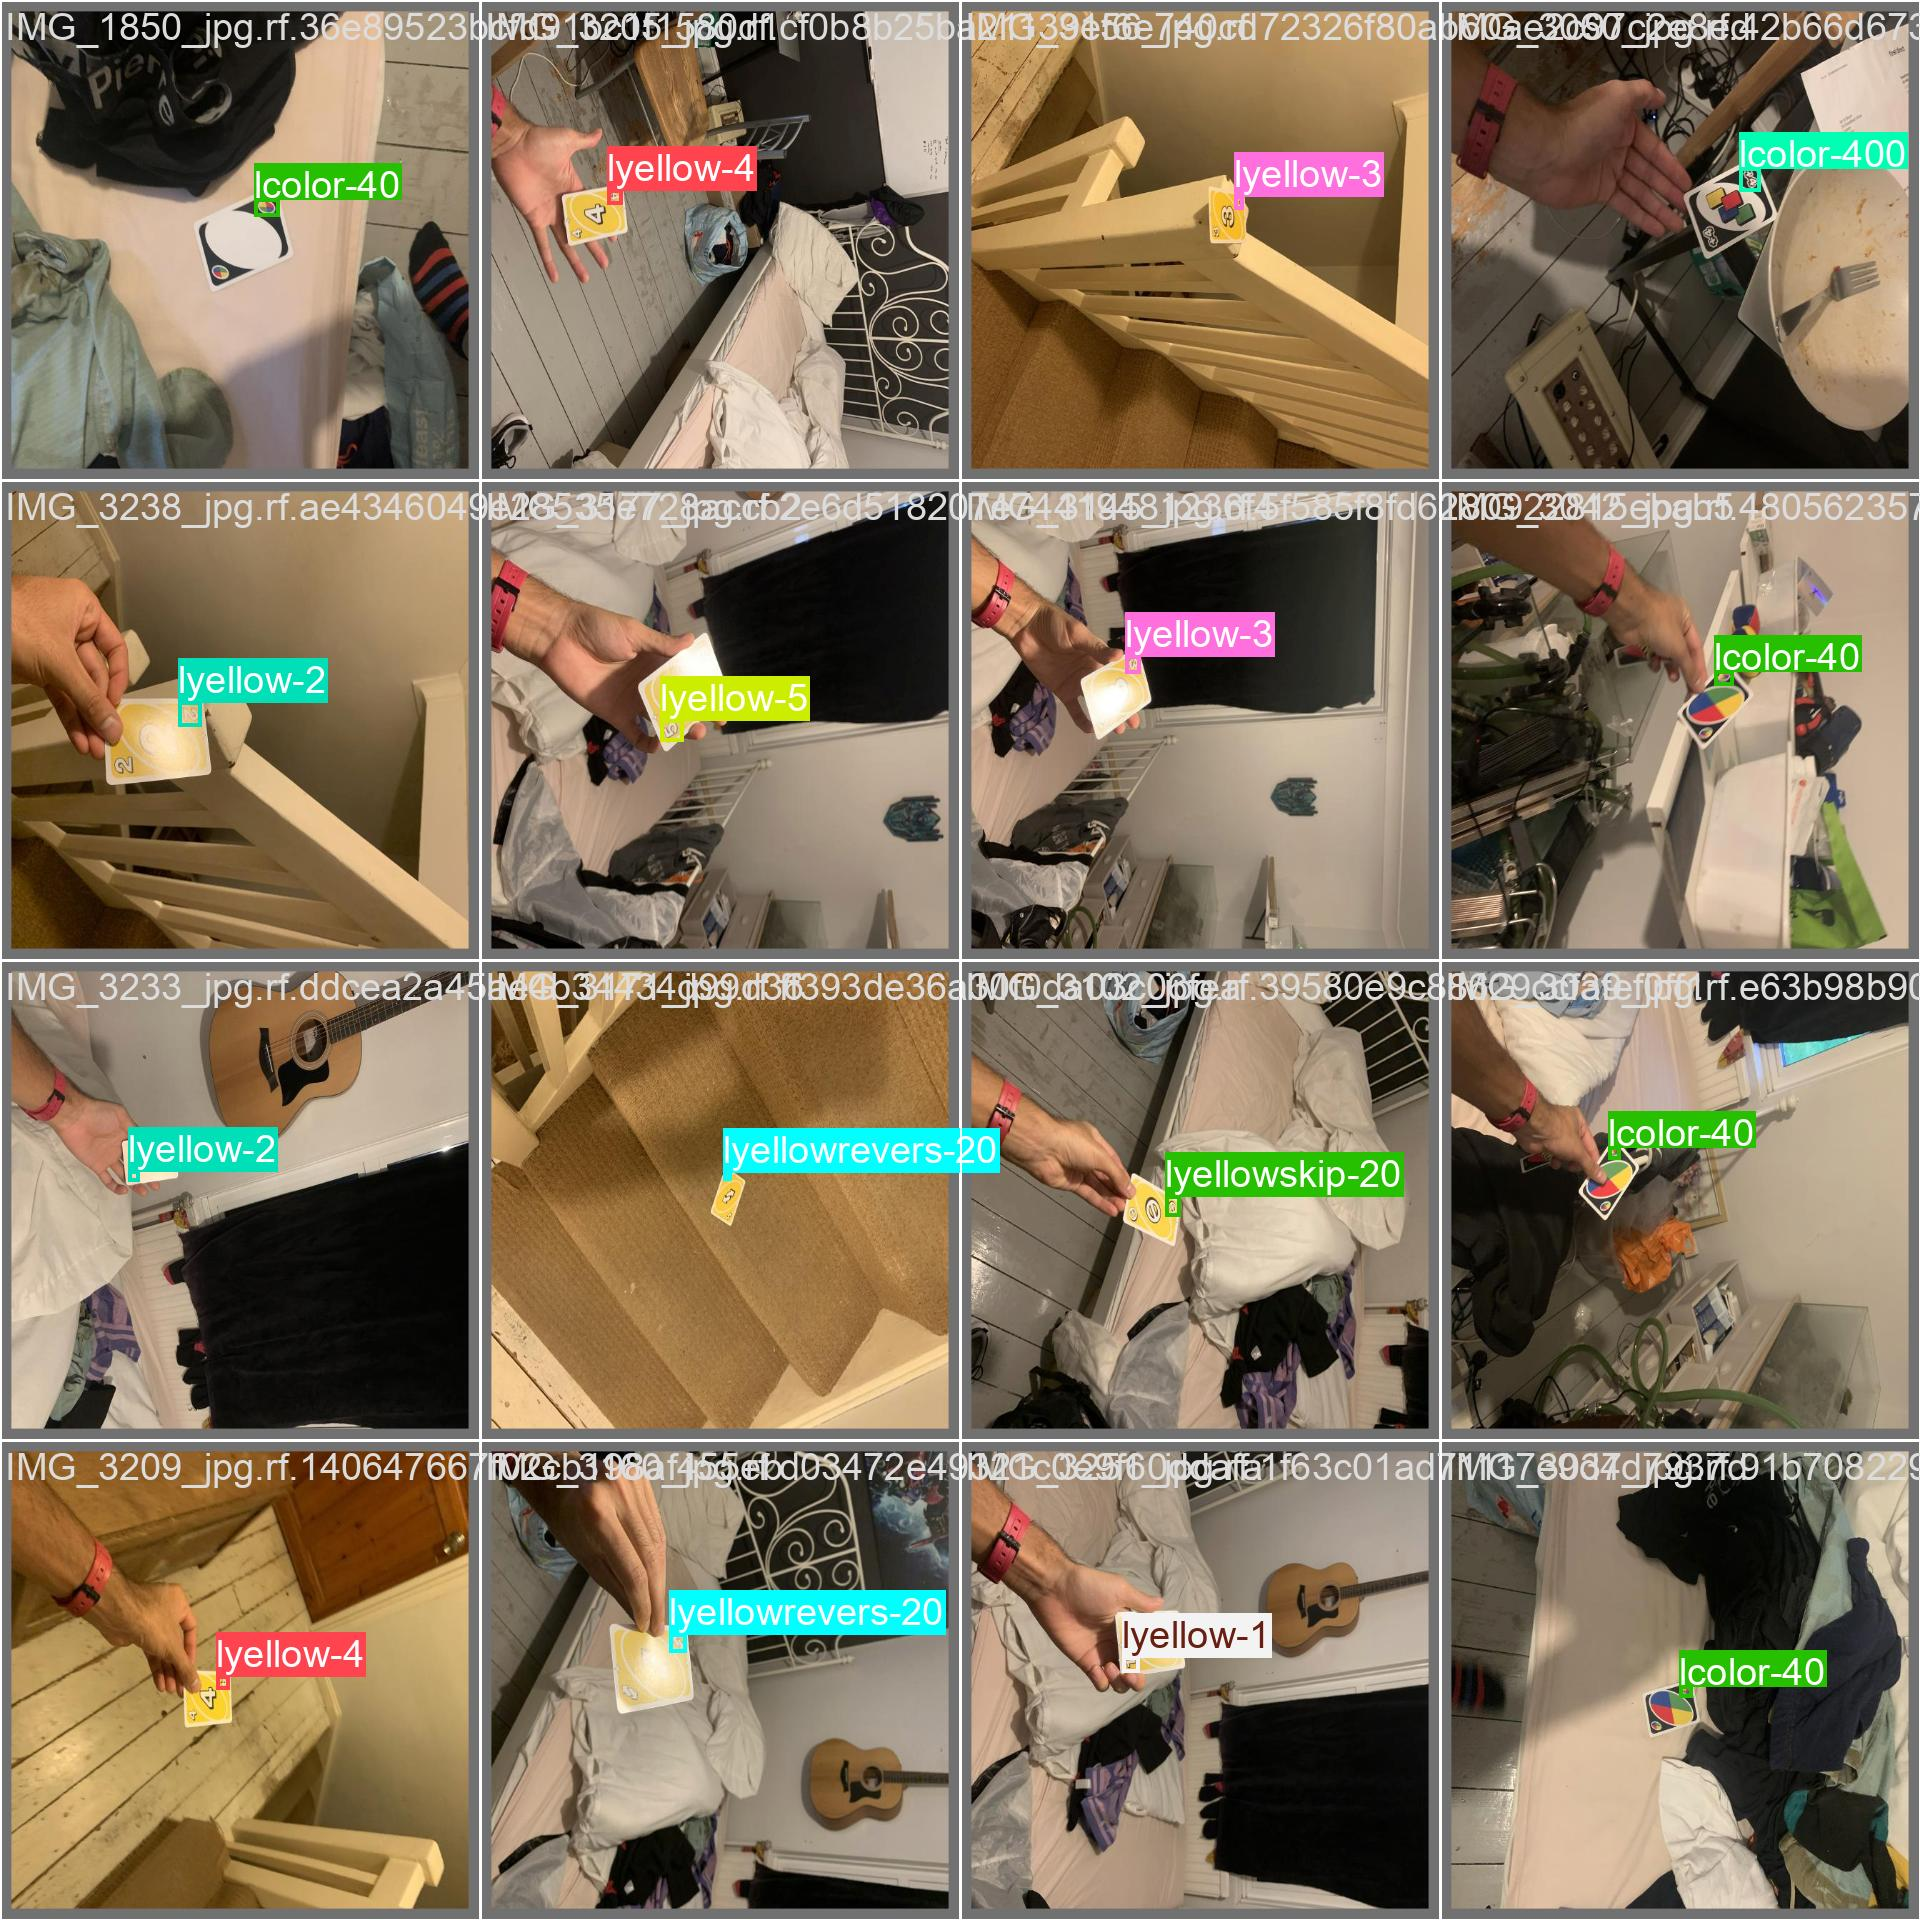

In [12]:
Image(filename='/content/UNO_Card_Detection_YOLOv8/train2/val_batch0_labels.jpg', width=600)

In [14]:
# Additional Performance Monitoring
# Validate the model and display metrics
model.val(data="unocards_dataset/data.yaml")

Ultralytics 8.3.134 🚀 Python-3.13.3 torch-2.7.0 CPU (Apple M1)
val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 788.6±249.3 MB/s, size: 51.5 KB)


val: Scanning /Volumes/NICE/yang penting 2/unocards_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]


                   all         10         10          0          0          0          0
                 red-1          1          1          0          0          0          0
                 red-2          3          3          0          0          0          0
                red-20          2          2          0          0          0          0
                 red-5          1          1          0          0          0          0
                 red-6          1          1          0          0          0          0
                 red-7          1          1          0          0          0          0
                 red-9          1          1          0          0          0          0
Speed: 1.0ms preprocess, 375.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to uno_train2/train34


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  6,  7,  8, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x6e0ed2660>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047

In [15]:
# Predict on test set with custom confidence level and save images for inspection
model.predict(
    source="/content/UNO-DATASET--3/test/images",
    conf=0.25,
    save=True
)


image 1/85 /content/UNO-DATASET--3/test/images/IMG_1849_jpg.rf.6d8d037e9aa0517f5e31b2b64c764e57.jpg: 640x640 2 lcolor-40s, 90.8ms
image 2/85 /content/UNO-DATASET--3/test/images/IMG_1854_jpg.rf.493b57cdbcf695995193957d94ef25f0.jpg: 640x640 2 lcolor-40s, 50.0ms
image 3/85 /content/UNO-DATASET--3/test/images/IMG_1870_jpg.rf.b8a694202d7032260a79c17277b7b653.jpg: 640x640 2 lcolor-400s, 46.3ms
image 4/85 /content/UNO-DATASET--3/test/images/IMG_1871_jpg.rf.d1e603462e76998af467639d5cb82c43.jpg: 640x640 1 lcolor-400, 45.8ms
image 5/85 /content/UNO-DATASET--3/test/images/IMG_1876_jpg.rf.3dfce518b8546e412e38e94d299046f6.jpg: 640x640 1 lcolor-40, 33.4ms
image 6/85 /content/UNO-DATASET--3/test/images/IMG_1882_jpg.rf.88791315216b9cfa7181dd7846aa2a96.jpg: 640x640 2 lcolor-40s, 33.5ms
image 7/85 /content/UNO-DATASET--3/test/images/IMG_1906_jpg.rf.8cbed8a1976609290a11d4d076e3ba5b.jpg: 640x640 1 lcolor-400, 34.7ms
image 8/85 /content/UNO-DATASET--3/test/images/IMG_1916_jpg.rf.3e1d135ae1c86730025e05bd54

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'lblue-0', 1: 'lblue-1', 2: 'lblue-2', 3: 'lblue-20', 4: 'lblue-3', 5: 'lblue-4', 6: 'lblue-5', 7: 'lblue-6', 8: 'lblue-7', 9: 'lblue-8', 10: 'lblue-9', 11: 'lbluerevers-20', 12: 'lblueskip-20', 13: 'lcolor-40', 14: 'lcolor-400', 15: 'lgreen-0', 16: 'lgreen-1', 17: 'lgreen-2', 18: 'lgreen-20', 19: 'lgreen-3', 20: 'lgreen-4', 21: 'lgreen-5', 22: 'lgreen-6', 23: 'lgreen-7', 24: 'lgreen-8', 25: 'lgreen-9', 26: 'lgreenrevers-20', 27: 'lgreenskip-20', 28: 'lred-0', 29: 'lred-1', 30: 'lred-2', 31: 'lred-20', 32: 'lred-3', 33: 'lred-4', 34: 'lred-5', 35: 'lred-6', 36: 'lred-7', 37: 'lred-8', 38: 'lred-9', 39: 'lredrevers-20', 40: 'lredskip-20', 41: 'lyellow-0', 42: 'lyellow-1', 43: 'lyellow-2', 44: 'lyellow-20', 45: 'lyellow-3', 46: 'lyellow-4', 47: 'lyellow-5', 48: 'lyellow-6', 49: 'lyellow-7', 50: 'lyellow-8', 51: 'lyellow-9', 52: 'lyellowre

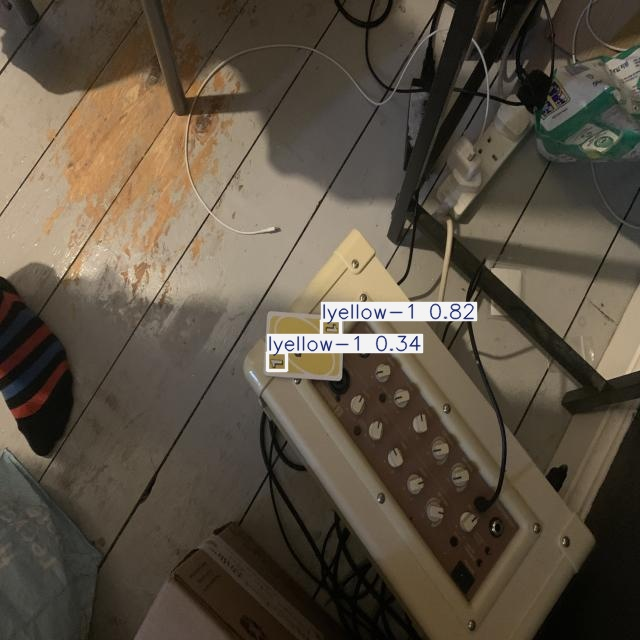

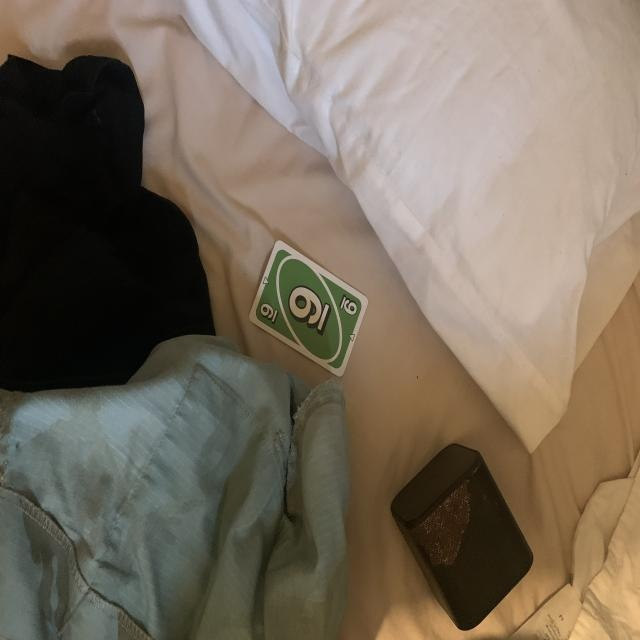

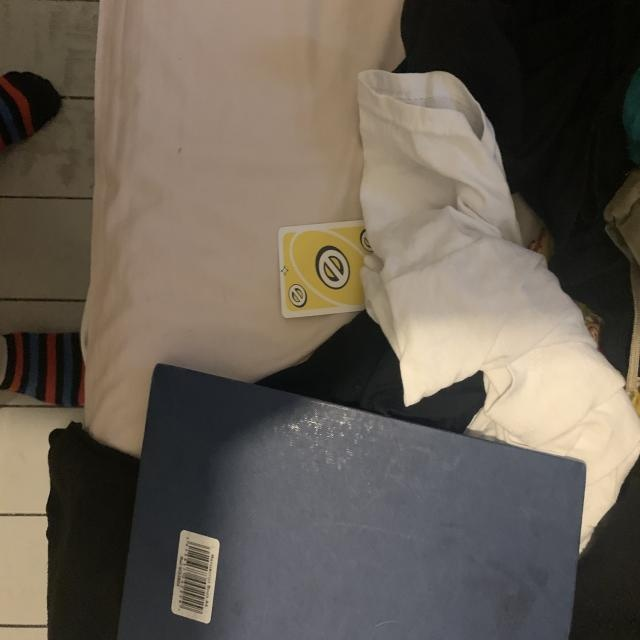

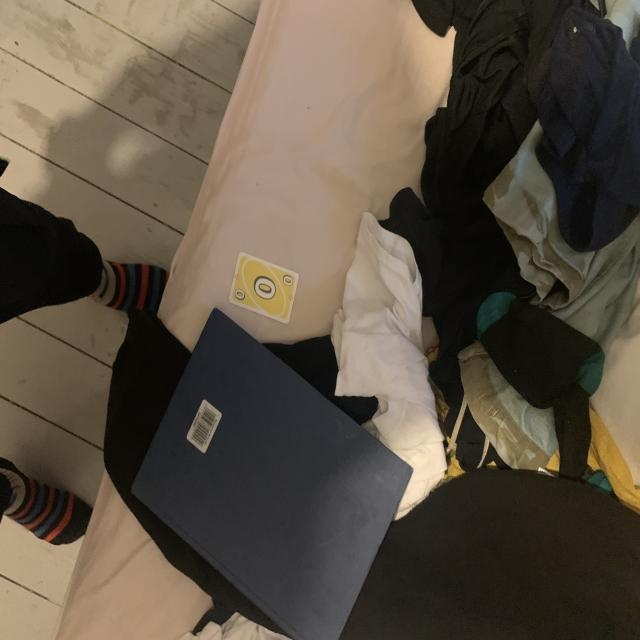

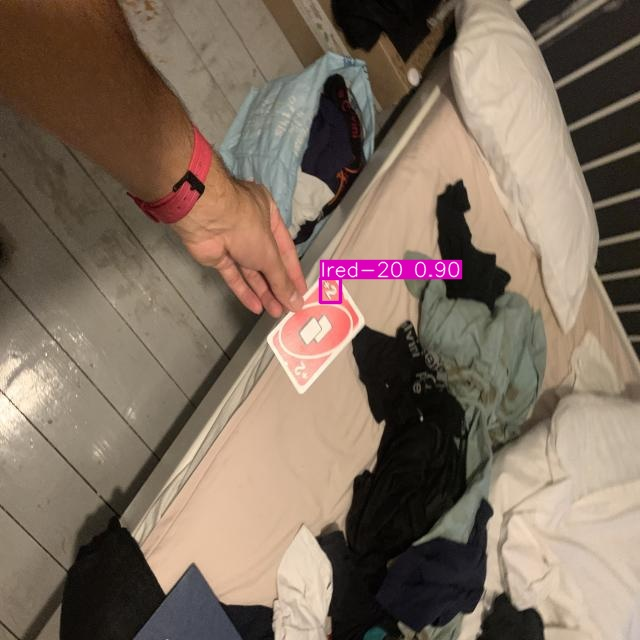

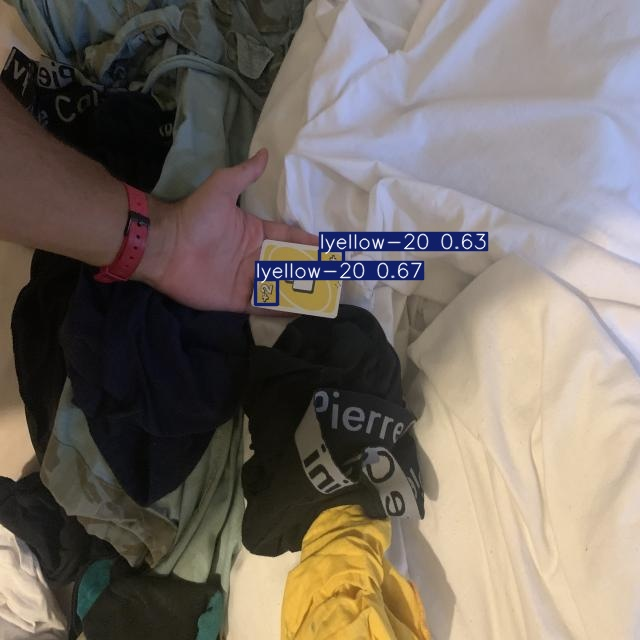

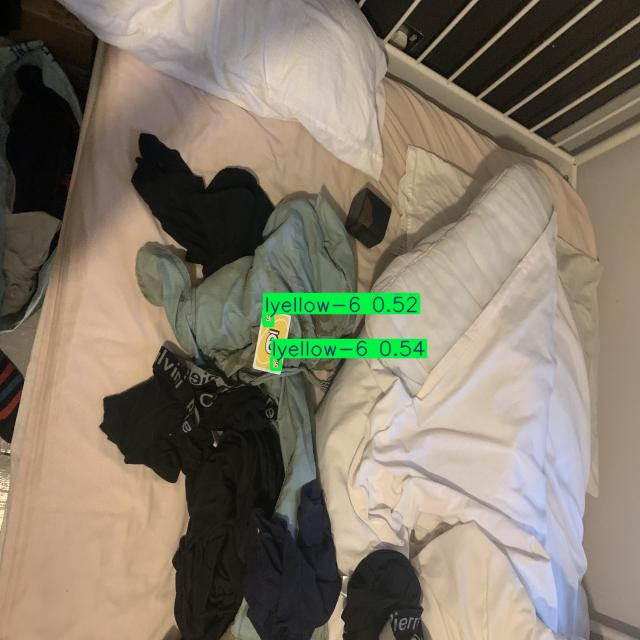

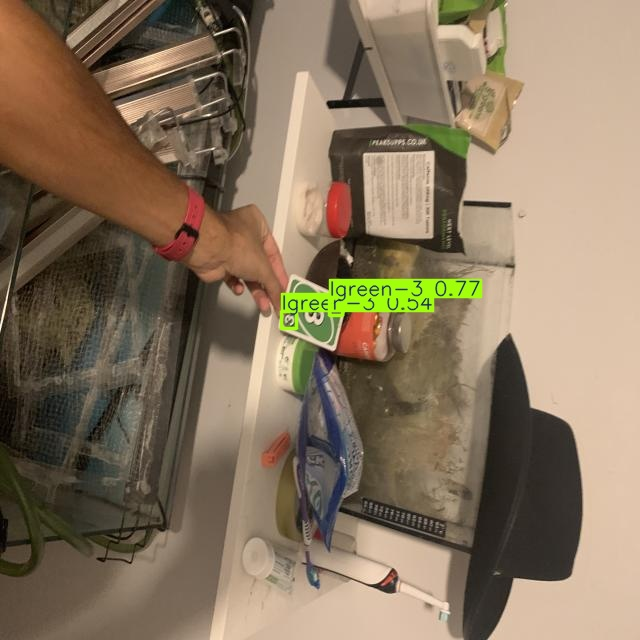

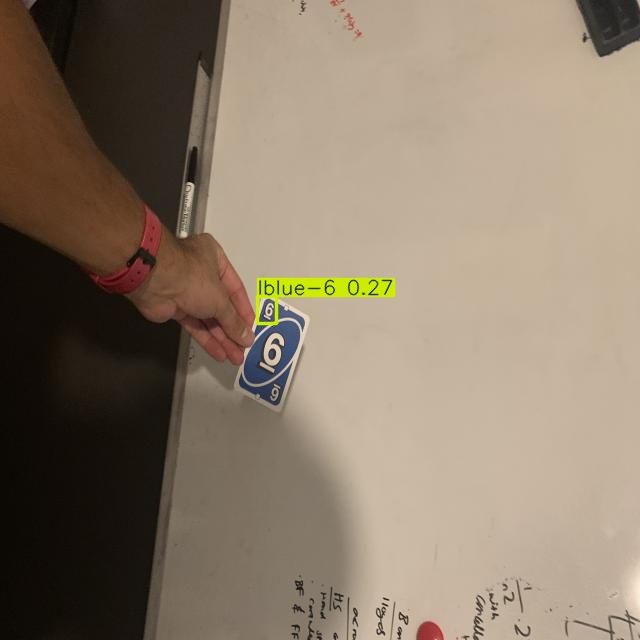

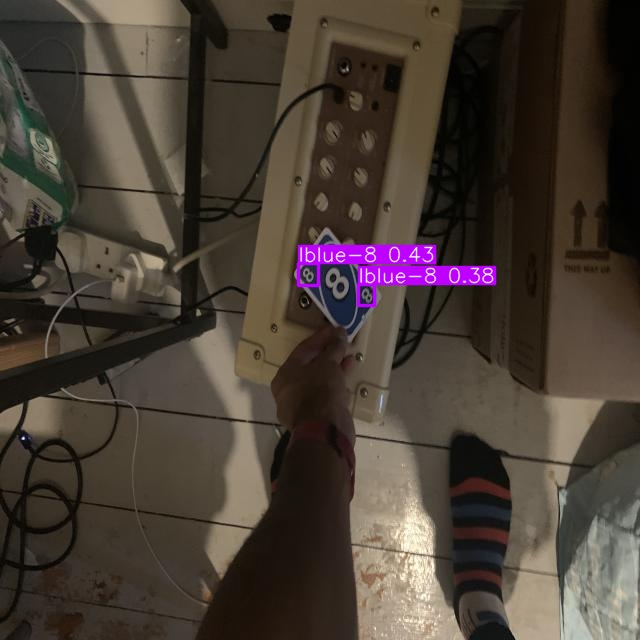

In [16]:
# Display sample predictions
import glob
from IPython.display import Image, display
for image_path in glob.glob('/content/UNO_Card_Detection_YOLOv8/train24/*.jpg')[:10]:
    display(Image(filename=image_path, width=400))
    print("\n")


In [22]:
import shutil
import os

# Define source and destination paths
source_folder = "/content/UNO_Card_Detection_YOLOv8"
destination_folder = "/content/drive/MyDrive/UNO_Card_Detection_YOLOv8"

# Ensure destination folder exists
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy files and subfolders manually
for root, dirs, files in os.walk(source_folder):
    # Construct the corresponding path in the destination
    dest_dir = root.replace(source_folder, destination_folder, 1)
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    for file in files:
        # Copy each file to the destination folder
        shutil.copy2(os.path.join(root, file), os.path.join(dest_dir, file))

print("All files and subfolders have been copied successfully!")

All files and subfolders have been copied successfully!
